<a href="https://colab.research.google.com/github/Saonoke/machine-learning-2024/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

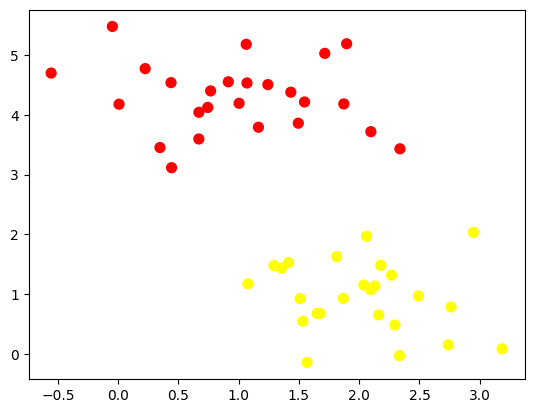

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

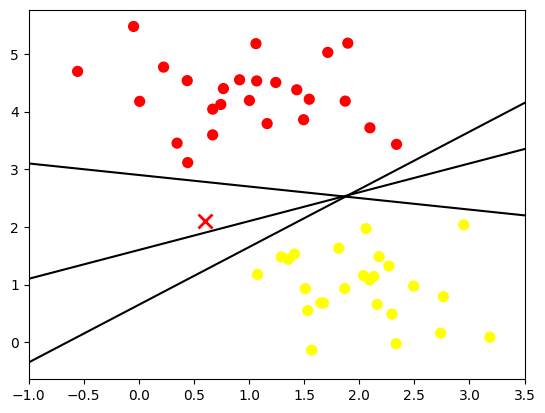

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

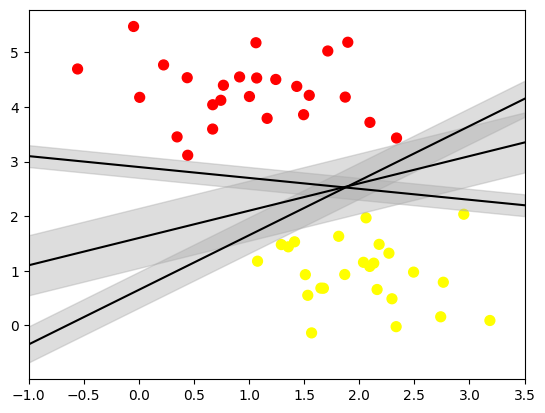

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

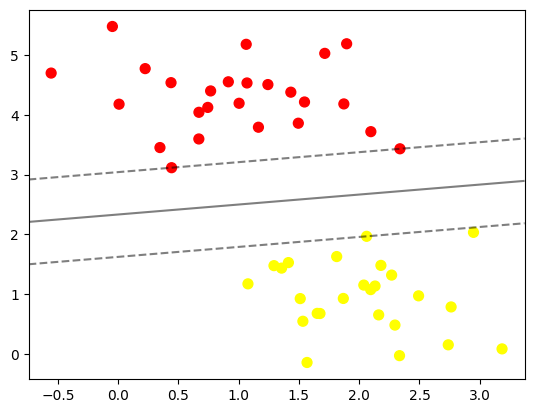

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

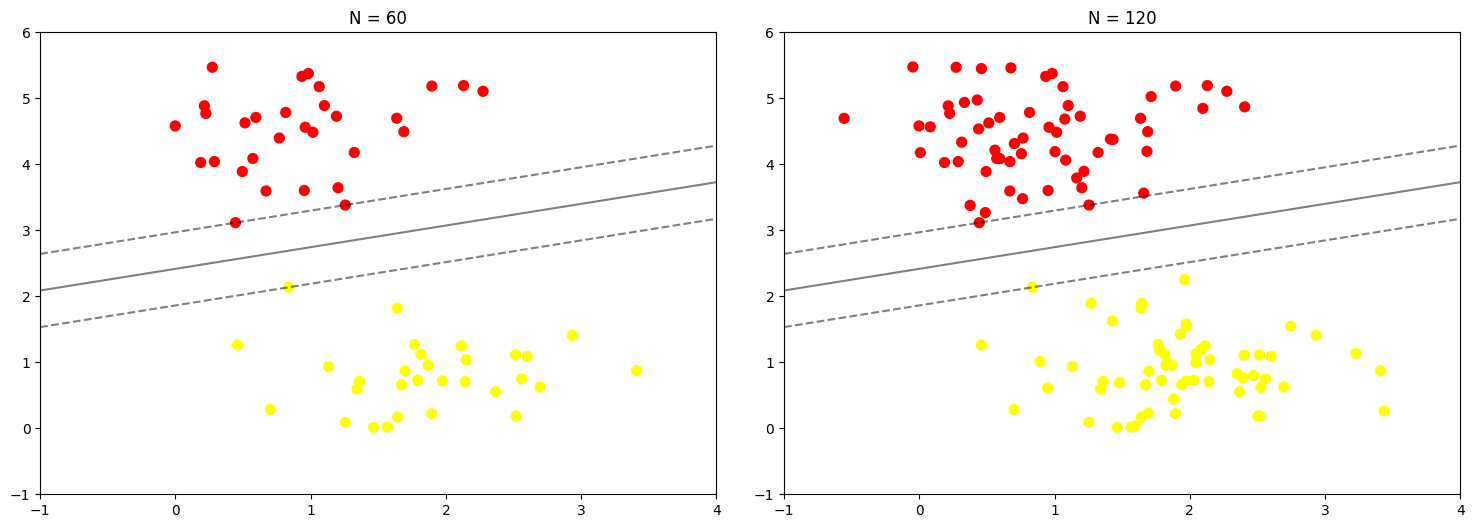

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

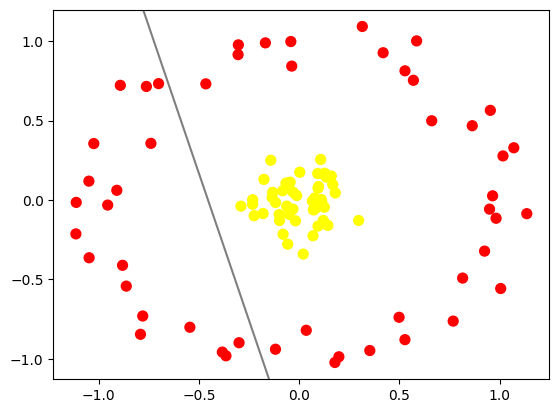

In [11]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [12]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.17987741,  0.04451291],
       [-0.06597901,  0.10623155],
       [ 0.1121578 , -0.01031506],
       [-0.06182743, -0.03839958],
       [ 0.16003512,  0.15109677],
       [ 0.14286617, -0.15995681],
       [ 0.07061779, -0.06150849],
       [-0.11791672, -0.0160995 ],
       [-0.30358169,  0.97757857],
       [ 0.58558738,  1.00269564],
       [ 0.81520185, -0.49203214],
       [-0.7805001 , -0.73099197],
       [ 0.17808579, -1.02386136],
       [-1.04793602, -0.36405094],
       [ 0.92453449, -0.32213275],
       [ 0.00272902,  0.17504769],
       [-0.04178811,  0.99850453],
       [ 0.09385902,  0.07502658],
       [ 0.11987764, -0.12884169],
       [-0.09820656, -0.12896473],
       [-0.01255997,  0.02781073],
       [ 0.08631957, -0.04735533],
       [ 0.0937241 , -0.16457802],
       [ 0.41859588,  0.92799036],
       [-0.2320677 ,  0.00176827],
       [-0.73963129,  0.35701676],
       [ 0.35214013, -0.94860997],
       [ 0.66088413,  0.49936306],
       [ 0.06891947, -0.22504862],
       [ 0.11998355,  0.1635372 ],
       [ 0.07433781, -0.06148186],
       [-0.13227088,  0.048225  ],
       [-0.05398867,  0.08295174],
       [ 0.06550827, -0.00671424],
       [-0.18041309, -0.08519484],
       [ 0.12532344, -0.04560027],
       [ 0.49812302, -0.73901768],
       [-0.03726929,  0.84377636],
       [-0.23213782, -0.02652069],
       [ 0.56957427,  0.75429001],
       [ 0.31468937,  1.09343428],
       [ 0.03508798, -0.82092594],
       [-0.08054722, -0.21585727],
       [-0.03113128, -0.0576722 ],
       [ 0.09253121,  0.16673521],
       [-0.0998905 , -0.09182108],
       [ 0.19784572, -0.98802618],
       [-0.38347535, -0.95843144],
       [-0.54531544, -0.80188879],
       [-0.30494697,  0.91611695],
       [-1.02464539,  0.35550913],
       [-0.0304206 ,  0.04942634],
       [-1.11224527, -0.01510293],
       [ 0.76804777, -0.76304581],
       [-0.11842644, -0.94041334],
       [ 0.09628329,  0.08469606],
       [-0.46579252,  0.73195217],
       [-0.70153038,  0.73343496],
       [-0.17593626,  0.12990241],
       [-0.88124255, -0.4115339 ],
       [ 0.96459732,  0.02646846],
       [-0.89229848,  0.72259567],
       [-0.76237614,  0.71545078],
       [ 0.52758608,  0.81404975],
       [-0.29065109, -0.03882468],
       [-0.01850095, -0.13139297],
       [ 1.07044374,  0.3291145 ],
       [-0.05746739, -0.27846442],
       [ 0.13533761,  0.14400279],
       [-0.05030652, -0.09050896],
       [-0.05323405,  0.10850867],
       [ 1.0163161 ,  0.27760145],
       [-0.224688  , -0.0987629 ],
       [-0.36532823, -0.98171833],
       [-0.13525396,  0.01574261],
       [-1.11388705, -0.21366981],
       [ 0.86304568,  0.46808724],
       [-0.04524965,  0.11237856],
       [-1.04900059,  0.11875843],
       [-0.90973776,  0.06113738],
       [ 0.16712687,  0.09710102],
       [ 0.52739904, -0.88004039],
       [-0.95528399, -0.03192325],
       [ 0.0781786 ,  0.01301399],
       [ 0.11042993,  0.00218238],
       [ 0.29640333, -0.12909557],
       [-0.30014268, -0.89944758],
       [ 0.98199848, -0.11501654],
       [-0.16873446,  0.99014125],
       [-0.08234609,  0.05813688],
       [ 1.13518779, -0.08626162],
       [ 0.10703731,  0.25538522],
       [ 0.94937254, -0.05757951],
       [-0.86264914, -0.54269694],
       [ 0.95328977,  0.56493556],
       [-0.14189896,  0.25038332],
       [ 1.00499551, -0.55774413],
       [ 0.02006512, -0.34107171],
       [ 0.12710546,  0.16856883],
       [-0.79168752, -0.84631727]]), y=array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]))>

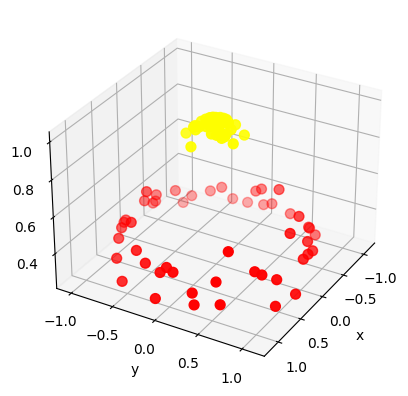

In [15]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.17987741,  0.04451291],
       [-0.06597901,  0.10623155],
       [ 0.1121578 , -0.01031506],
       [-0.06182743, -0.03839958],
       [ 0.16003512,  0.15109677],
       [ 0.14286617, -0.15995681],
       [ 0.07061779, -0.06150849],
       [-0.11791672, -0.0160995 ],
       [-0.30358169,  0.97757857],
       [ 0.58558738,  1.00269564],
       [ 0.81520185, -0.49203214],
       [-0.7805001 , -0.73099197],
       [ 0.17808579, -1.02386136],
       [-1.04793602, -0.36405094],
       [ 0.92453449, -0.32213275],
       [ 0.00272902,  0.17504769],
       [-0.04178811,  0.99850453],
       [ 0.09385902,  0.07502658],
       [ 0.11987764, -0.12884169],
       [-0.09820656, -0.12896473],
       [-0.01255997,  0.02781073],
       [ 0.08631957, -0.04735533],
       [ 0.0937241 , -0.16457802],
       [ 0.41859588,  0.92799036],
       [-0.2320677 ,  0.00176827],
       [-0.73963129,  0.35701676],
       [ 0.35214013, -0.94860997],
       [ 0.66088413,  0.49936306],
       [ 0.06891947, -0.22504862],
       [ 0.11998355,  0.1635372 ],
       [ 0.07433781, -0.06148186],
       [-0.13227088,  0.048225  ],
       [-0.05398867,  0.08295174],
       [ 0.06550827, -0.00671424],
       [-0.18041309, -0.08519484],
       [ 0.12532344, -0.04560027],
       [ 0.49812302, -0.73901768],
       [-0.03726929,  0.84377636],
       [-0.23213782, -0.02652069],
       [ 0.56957427,  0.75429001],
       [ 0.31468937,  1.09343428],
       [ 0.03508798, -0.82092594],
       [-0.08054722, -0.21585727],
       [-0.03113128, -0.0576722 ],
       [ 0.09253121,  0.16673521],
       [-0.0998905 , -0.09182108],
       [ 0.19784572, -0.98802618],
       [-0.38347535, -0.95843144],
       [-0.54531544, -0.80188879],
       [-0.30494697,  0.91611695],
       [-1.02464539,  0.35550913],
       [-0.0304206 ,  0.04942634],
       [-1.11224527, -0.01510293],
       [ 0.76804777, -0.76304581],
       [-0.11842644, -0.94041334],
       [ 0.09628329,  0.08469606],
       [-0.46579252,  0.73195217],
       [-0.70153038,  0.73343496],
       [-0.17593626,  0.12990241],
       [-0.88124255, -0.4115339 ],
       [ 0.96459732,  0.02646846],
       [-0.89229848,  0.72259567],
       [-0.76237614,  0.71545078],
       [ 0.52758608,  0.81404975],
       [-0.29065109, -0.03882468],
       [-0.01850095, -0.13139297],
       [ 1.07044374,  0.3291145 ],
       [-0.05746739, -0.27846442],
       [ 0.13533761,  0.14400279],
       [-0.05030652, -0.09050896],
       [-0.05323405,  0.10850867],
       [ 1.0163161 ,  0.27760145],
       [-0.224688  , -0.0987629 ],
       [-0.36532823, -0.98171833],
       [-0.13525396,  0.01574261],
       [-1.11388705, -0.21366981],
       [ 0.86304568,  0.46808724],
       [-0.04524965,  0.11237856],
       [-1.04900059,  0.11875843],
       [-0.90973776,  0.06113738],
       [ 0.16712687,  0.09710102],
       [ 0.52739904, -0.88004039],
       [-0.95528399, -0.03192325],
       [ 0.0781786 ,  0.01301399],
       [ 0.11042993,  0.00218238],
       [ 0.29640333, -0.12909557],
       [-0.30014268, -0.89944758],
       [ 0.98199848, -0.11501654],
       [-0.16873446,  0.99014125],
       [-0.08234609,  0.05813688],
       [ 1.13518779, -0.08626162],
       [ 0.10703731,  0.25538522],
       [ 0.94937254, -0.05757951],
       [-0.86264914, -0.54269694],
       [ 0.95328977,  0.56493556],
       [-0.14189896,  0.25038332],
       [ 1.00499551, -0.55774413],
       [ 0.02006512, -0.34107171],
       [ 0.12710546,  0.16856883],
       [-0.79168752, -0.84631727]]), y=array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]))>

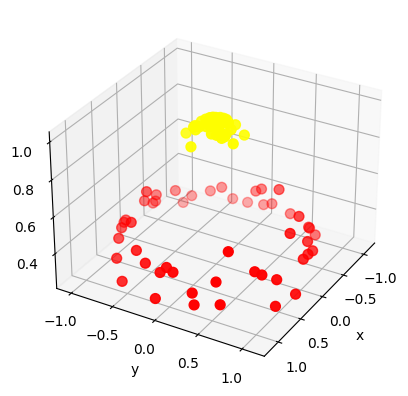

In [20]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

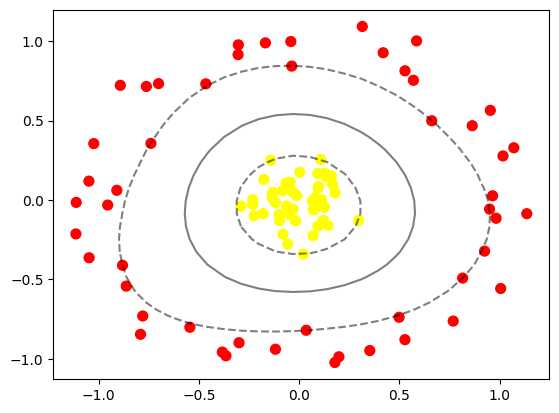

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

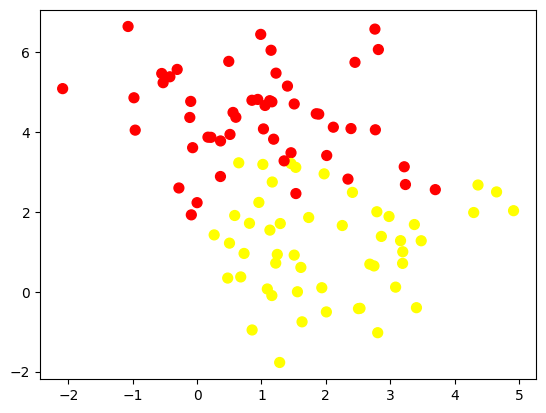

In [22]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

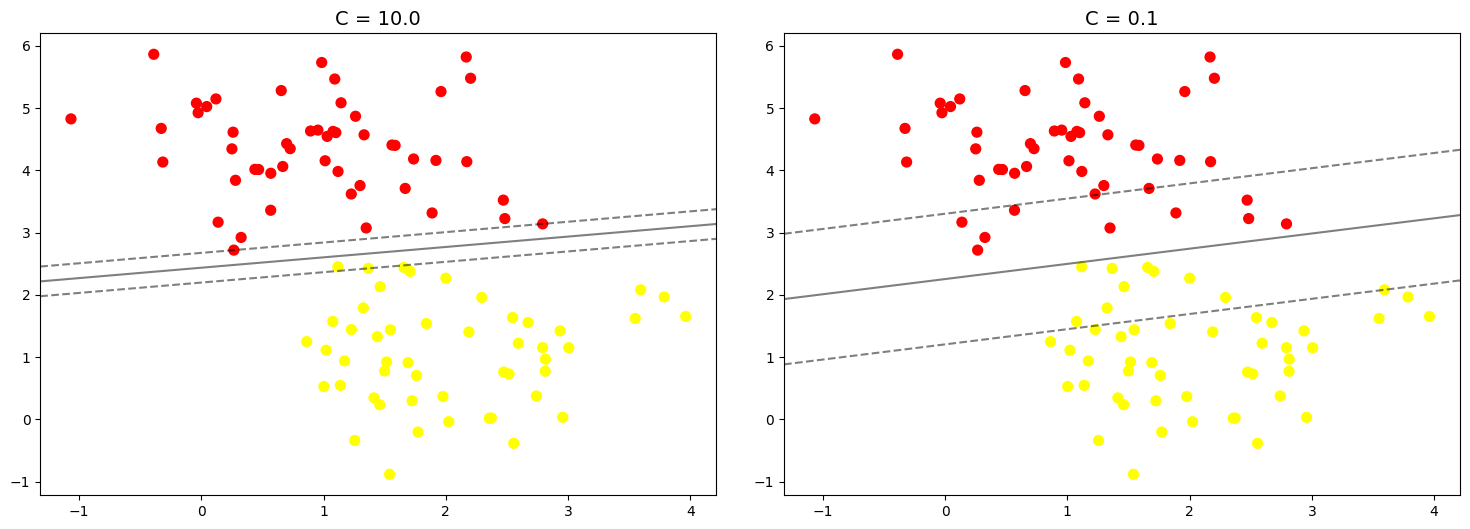

In [23]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Praktikum 2

In [24]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


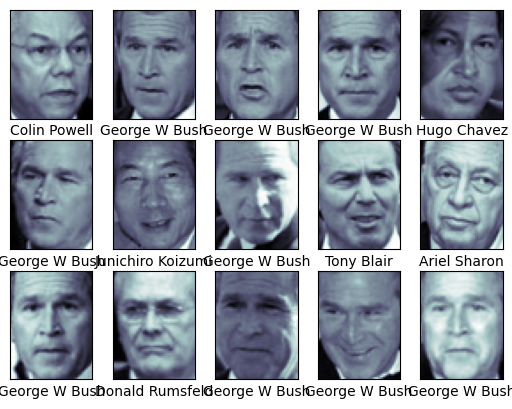

In [25]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [26]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [27]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 41s, sys: 26.6 s, total: 2min 7s
Wall time: 1min 22s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [29]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

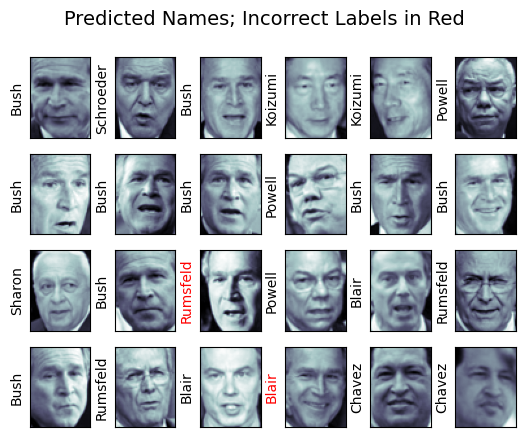

In [30]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

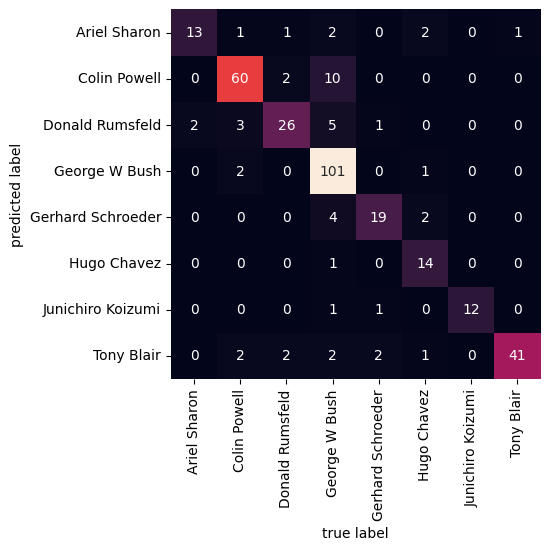

In [32]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Praktikum 3

In [33]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[130 110]
 [165   1]
 [291 206]
 [ 94 266]
 [172  32]
 [ 52 234]
 [ 82 271]
 [160 274]
 [194  24]
 [ 13 142]
 [ 78  40]
 [ 45 200]
 [ 73 113]
 [196  21]
 [ 77 112]
 [  1 199]
 [ 91  82]
 [125 114]
 [ 80 115]
 [ 31  70]
 [100 110]
 [  8  77]
 [ 28  60]
 [271   5]
 [ 34 213]
 [130  63]
 [158  75]
 [ 95  91]
 [103  96]
 [ 16 216]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [34]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,130,110,0
1,165,1,0
2,291,206,0
3,94,266,0
4,172,32,0


In [35]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,130,110,Kelas B
1,165,1,Kelas B
2,291,206,Kelas B
3,94,266,Kelas B
4,172,32,Kelas B


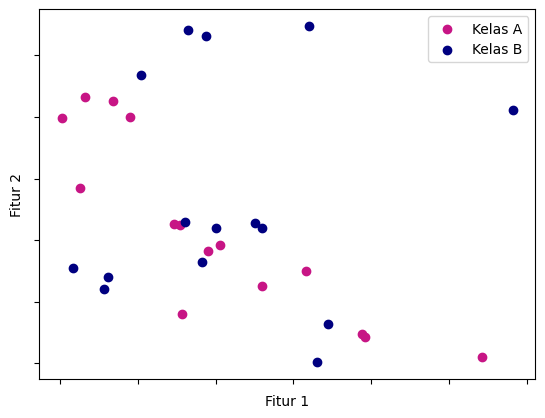

In [36]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [37]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.6666666666666666


In [38]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6190476190476191
Hasil akurasi data test (Gaussian): 0.2222222222222222


# Praktikum 4

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

In [43]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
X = df['SMS'].values
y = df['Labels'].values

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [8]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


# Praktikum 5

In [10]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [11]:

# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

In [12]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [13]:
# Load training data
train_img = load_dataset(train_dir)

In [14]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 54,  36,  26],
         [ 54,  36,  26],
         [ 54,  36,  26],
         ...,
         [ 66,  44,  31],
         [ 66,  44,  31],
         [ 66,  44,  31]],
 
        [[ 54,  36,  26],
         [ 54,  36,  26],
         [ 54,  36,  26],
         ...,
         [ 66,  44,  31],
         [ 66,  44,  31],
         [ 66,  44,  31]],
 
        [[ 54,  36,  26],
         [ 54,  36,  26],
         [ 54,  36,  26],
         ...,
         [ 66,  44,  31],
         [ 66,  44,  31],
         [ 66,  44,  31]],
 
        ...,
 
        [[183, 110,  69],
         [155,  91,  47],
         [145,  93,  45],
         ...,
         [116,  62,  18],
         [116,  62,  18],
         [116,  62,  18]],
 
        [[153,  85,  48],
         [197, 138,  98],
         [152, 108,  63],
         ...,
         [115,  62,  20],
         [115,  62,  20],
         [116,  63,  21]],
 
        [[178, 114,  79],
         [255, 201, 164],
         [228, 185, 143],
         ...,
         [115,  62,  20],
  

In [15]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 227
(889, 1280, 3)


In [16]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (889, 1280, 3)
Label	: night


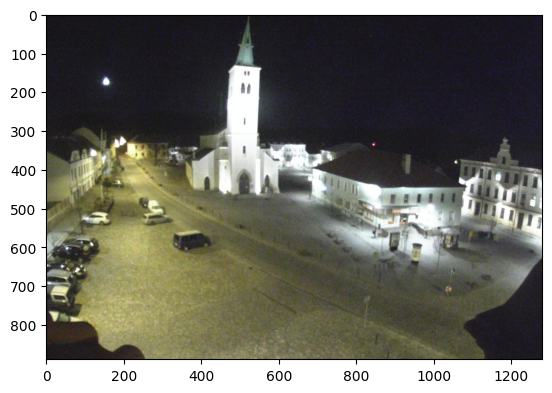

In [17]:
random_img_viz(train_img)

In [18]:

def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [19]:

def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [20]:

def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [21]:
train_std_img_list = preprocess(train_img)

In [22]:

# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 132
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


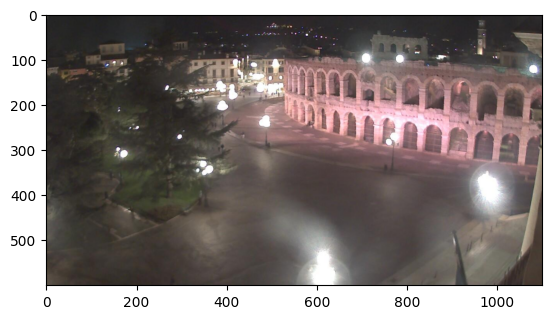

In [23]:
random_img_viz(train_std_img_list)

In [24]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 31
Avg Brighness: 13.9729


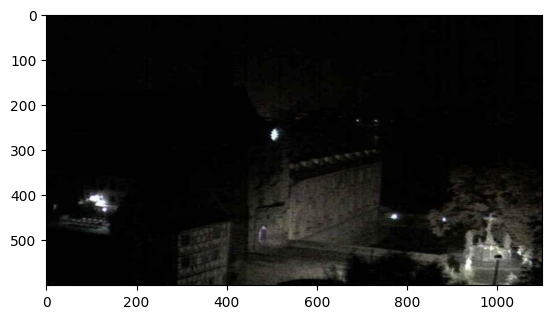

In [25]:

# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [26]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 203
Actual label: 1
Predicted label: 1


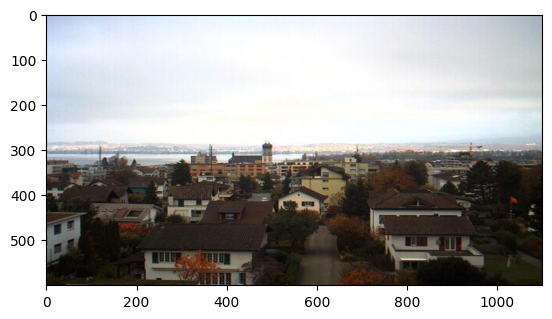

In [27]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [28]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [29]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8383


In [30]:

# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


In [31]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [32]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (235, 2)


,AVG_BRIGHT,LABELS
0,110.130647,0.0
1,98.982730,0.0
2,22.901848,0.0
3,97.690179,0.0
4,25.731924,0.0


In [33]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,34.766211,0.0
1,94.264071,0.0
2,98.235594,0.0
3,86.790155,0.0
4,22.356079,0.0


In [34]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

In [35]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8553191489361702
Accuracy on test: 0.9
